In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from astropy.table import Table, vstack
import glob

In [2]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 20

# Data analysis

# MC - Data comparison

In [3]:
def format_axes(ax,option):
    
    if(option=='width'):
        ax.set_xlabel('Muon radius [deg]')
        ax.set_ylabel('Muon ring width [deg]')
        ax.grid(linestyle="dashed")
        #ax.set_ylim(0.042,0.07)
        ax.legend()
    if(option=='size'):
        ax2.grid(linestyle="dashed")
        ax2.legend(ncol=2)
        ax2.set_xlabel('Muon radius [deg]')
        ax2.set_ylabel('Muon Size [pe]')
        ax2.set_ylim(2000,4500)

In [4]:
OPT_EFF=[0.6, 0.7, 0.8, 0.9, 1.0]
MIR_MIS=[0.00125, 0.0025, 0.0035, 0.005, 0.0075, 0.01, 0.0125]
colors = ['C0', 'C1', 'C2', 'C3', 'C4']


In [9]:
size_outside = 500 # phe

# 20200114

In [6]:
from astropy.table import Table, vstack
import glob

date=20200114

listdir = glob.glob('../../../cta-lstchain-extra/muons/real/20200114/*1*'.format(date))
# Muons analyzed using GlobalPeakWindowSum

dat = Table.read('./{}'.format(listdir[0]), format='fits')
for i in range(1,len(listdir)):
    dat2 = Table.read('./{}'.format(listdir[i]), format='fits')
    dat = vstack([dat, dat2])

df = dat.to_pandas()
df_good_data = df[df['good_ring']]

../../../cta-lstchain-extra/muons/real/20200114/data_table_dl1_LST-1.1.Run01787.0117.fits


../../../cta-lstchain-extra/muons/simulations/lstchain_v0.3.1/dl1_muon_0deg_0deg_run69___cta-prod3-lst_desert-2180m-LaPalma-lst-OptEff0.6.simtel.fits
../../../cta-lstchain-extra/muons/simulations/lstchain_v0.3.1/dl1_muon_0deg_0deg_run69___cta-prod3-lst_desert-2180m-LaPalma-lst-OptEff0.7.simtel.fits
../../../cta-lstchain-extra/muons/simulations/lstchain_v0.3.1/dl1_muon_0deg_0deg_run69___cta-prod3-lst_desert-2180m-LaPalma-lst-OptEff0.8.simtel.fits
../../../cta-lstchain-extra/muons/simulations/lstchain_v0.3.1/dl1_muon_0deg_0deg_run69___cta-prod3-lst_desert-2180m-LaPalma-lst-OptEff0.9.simtel.fits
../../../cta-lstchain-extra/muons/simulations/lstchain_v0.3.1/dl1_muon_0deg_0deg_run69___cta-prod3-lst_desert-2180m-LaPalma-lst-OptEff1.0.simtel.fits


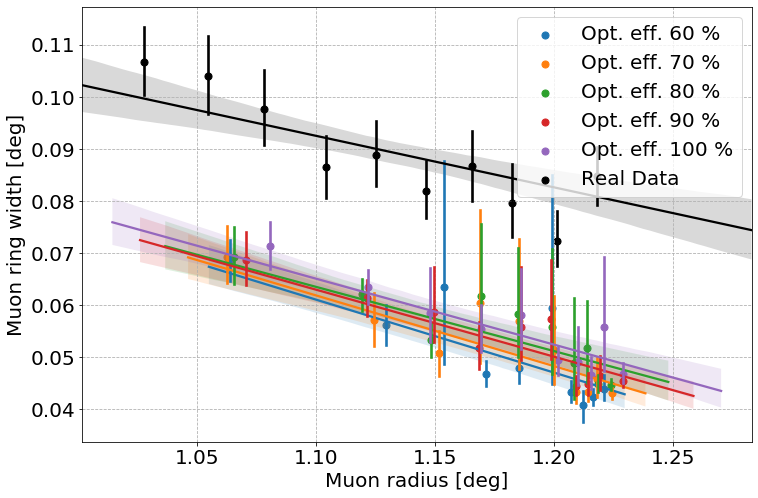

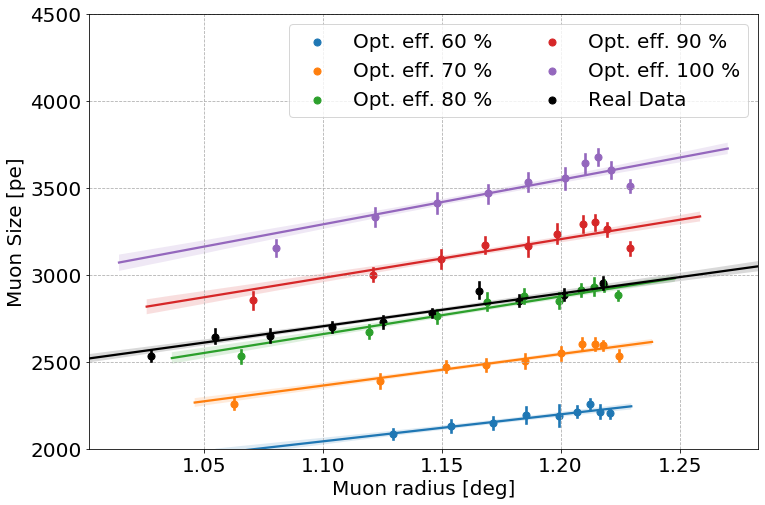

In [8]:
fig,ax = plt.subplots()
fig2,ax2 = plt.subplots()

for (opt_eff, col) in zip(OPT_EFF, colors):
    file=f'../../../cta-lstchain-extra/muons/simulations/lstchain_v0.3.1/dl1_muon_0deg_0deg_run69___cta-prod3-lst_desert-2180m-LaPalma-lst-OptEff{opt_eff}.simtel.fits'
    print(file)
    
    dat = Table.read(file)
    df = dat.to_pandas()
    df_good = df[df['good_ring']]
    
    
    sns.regplot(x = df_good['ring_radius'][(df_good['ring_completeness'] > 0.9) 
                                           & (df_good['size_outside'] < size_outside)], 
            y = df_good['ring_width'][(df_good['ring_completeness'] > 0.9) 
                                     & (df_good['size_outside'] < size_outside)], x_bins=10, 
                ax=ax, color=col, label='Opt. eff. %.0f %%' %(opt_eff*100))
    sns.regplot(x = df_good['ring_radius'][(df_good['ring_completeness'] > 0.9) 
                                           & (df_good['size_outside'] < size_outside)], 
            y = df_good['ring_size'][(df_good['ring_completeness'] > 0.9) 
                                     & (df_good['size_outside'] < size_outside)], x_bins=10, 
                ax=ax2, color=col, label='Opt. eff. %.0f %%' %(opt_eff*100))


sns.regplot(x = df_good_data['ring_radius'][(df_good_data['ring_completeness'] > 0.9) & (df_good_data['size_outside'] < size_outside)], 
            y = df_good_data['ring_width'][(df_good_data['ring_completeness'] > 0.9) & (df_good_data['size_outside'] < size_outside)], 
            x_bins=10, ax=ax, color = 'k', label = 'Real Data')
sns.regplot(x = df_good_data['ring_radius'][(df_good_data['ring_completeness'] > 0.9) & (df_good_data['size_outside'] < size_outside)], 
            y = df_good_data['ring_size'][(df_good_data['ring_completeness'] > 0.9) & (df_good_data['size_outside'] < size_outside)], 
            x_bins=10, ax=ax2, color = 'k', label = 'Real Data')

format_axes(ax,'width')        
format_axes(ax2,'size') 